#### Decision tree for breast cancer prediction

Breast carcinoma is a prevalent cancer affecting women globally. The process of normal cells transitioning into cancer cells involves multiple stages. 
The morphological characteristics of the nucleus serve as a distinct indicator for cancer diagnosis. Throughout the progression of the disease, there is a gradual alteration in nuclear parameters from benign to malignant.
Breast cancer has been associated with variations in nuclear size, shape, chromatin pattern, as well as the size and number of nucleoli [1]. These morphometric features of the nucleus have demonstrated the ability to predict the prognosis of breast cancer patients [2].

Objective evaluation of nuclear changes occurring during these transformative steps is crucial. As a result, nuclear morphometry can serve as a valuable diagnostic tool.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1. Pienta KJ, Coffey DS. Correlation of nuclear morphometry with progression of breast cancer. Cancer. 1991;68:2012–6. [PubMed] [Google Scholar]
2. Cui Y, Koop EA, van Diest PJ, Kandel RA, Rohan TE. Nuclear morphometric features in benign breast tissue and risk of subsequent breast cancer. Breast Cancer Res Treat. 2007;104:103–7. [PMC free article] [PubMed] [Google Scholar]



In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir("C:\\Users\\Julian\\Desktop\\DATA\\Proyectos DS\\BreastCancer")

In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory analisis


## Data structure

In [4]:
#Df shape
df.shape

(569, 33)

In [5]:
df.size

18777

The dataset consist of 569 rows and 33 columns.

### Columns analysis

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [9]:
df= df.replace({"M":1, "B":0})

## Cleaning the data

In [10]:
#Null values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
#Duplicated values
df.duplicated().sum()

0

In [12]:
#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)

## Descriptive statistics

In [13]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


This dataframe consist of 569 breast cancer with measures of different characteristics.Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter^2 / area - 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.

## Data visualization

## Density plot


c:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

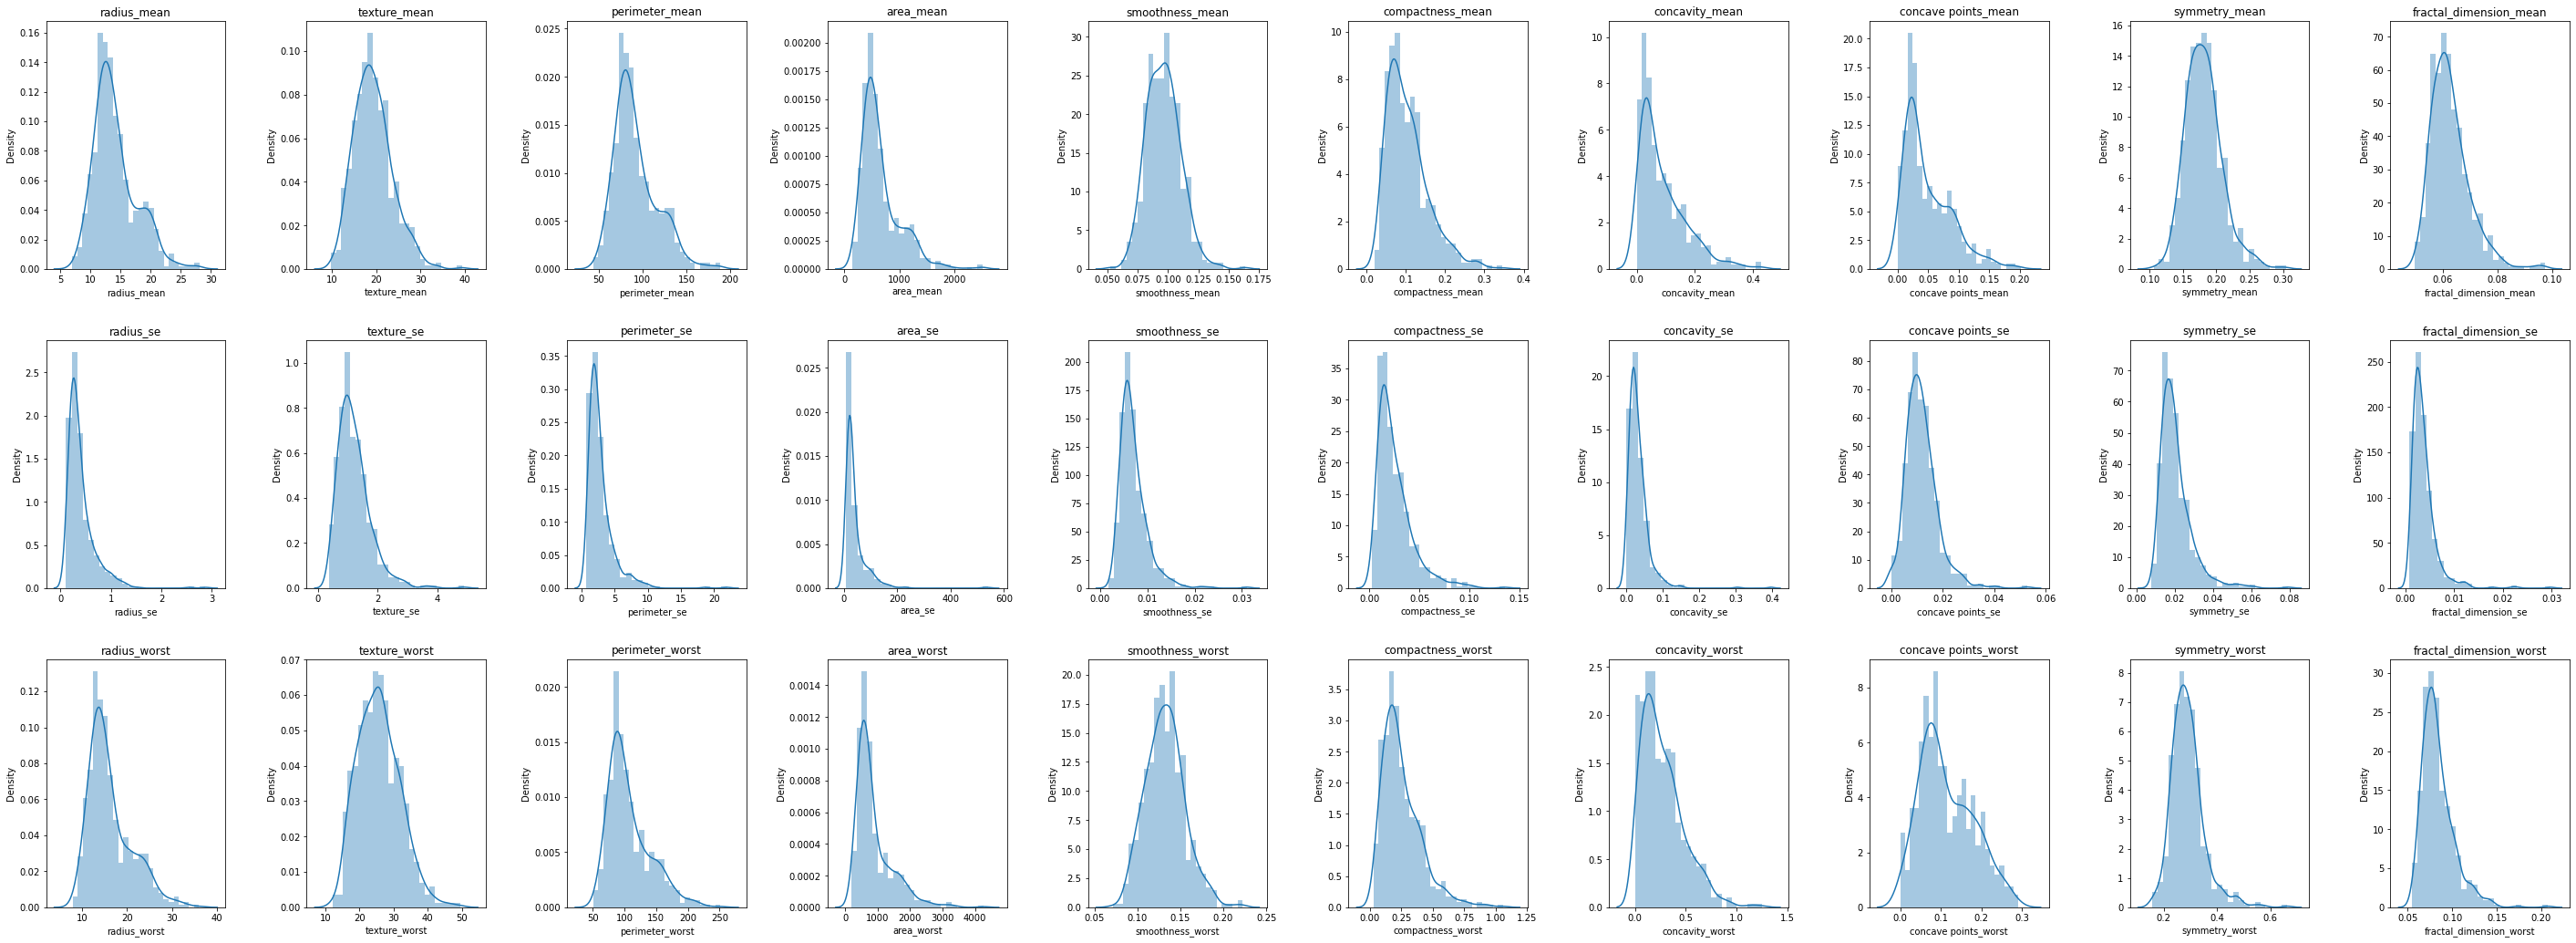

In [14]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    sns.distplot(df[x] , bins = 25)
    plt.title('{}'.format(x))


## Box-plot

c:\Users\Julian\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Julian\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.6% of the p

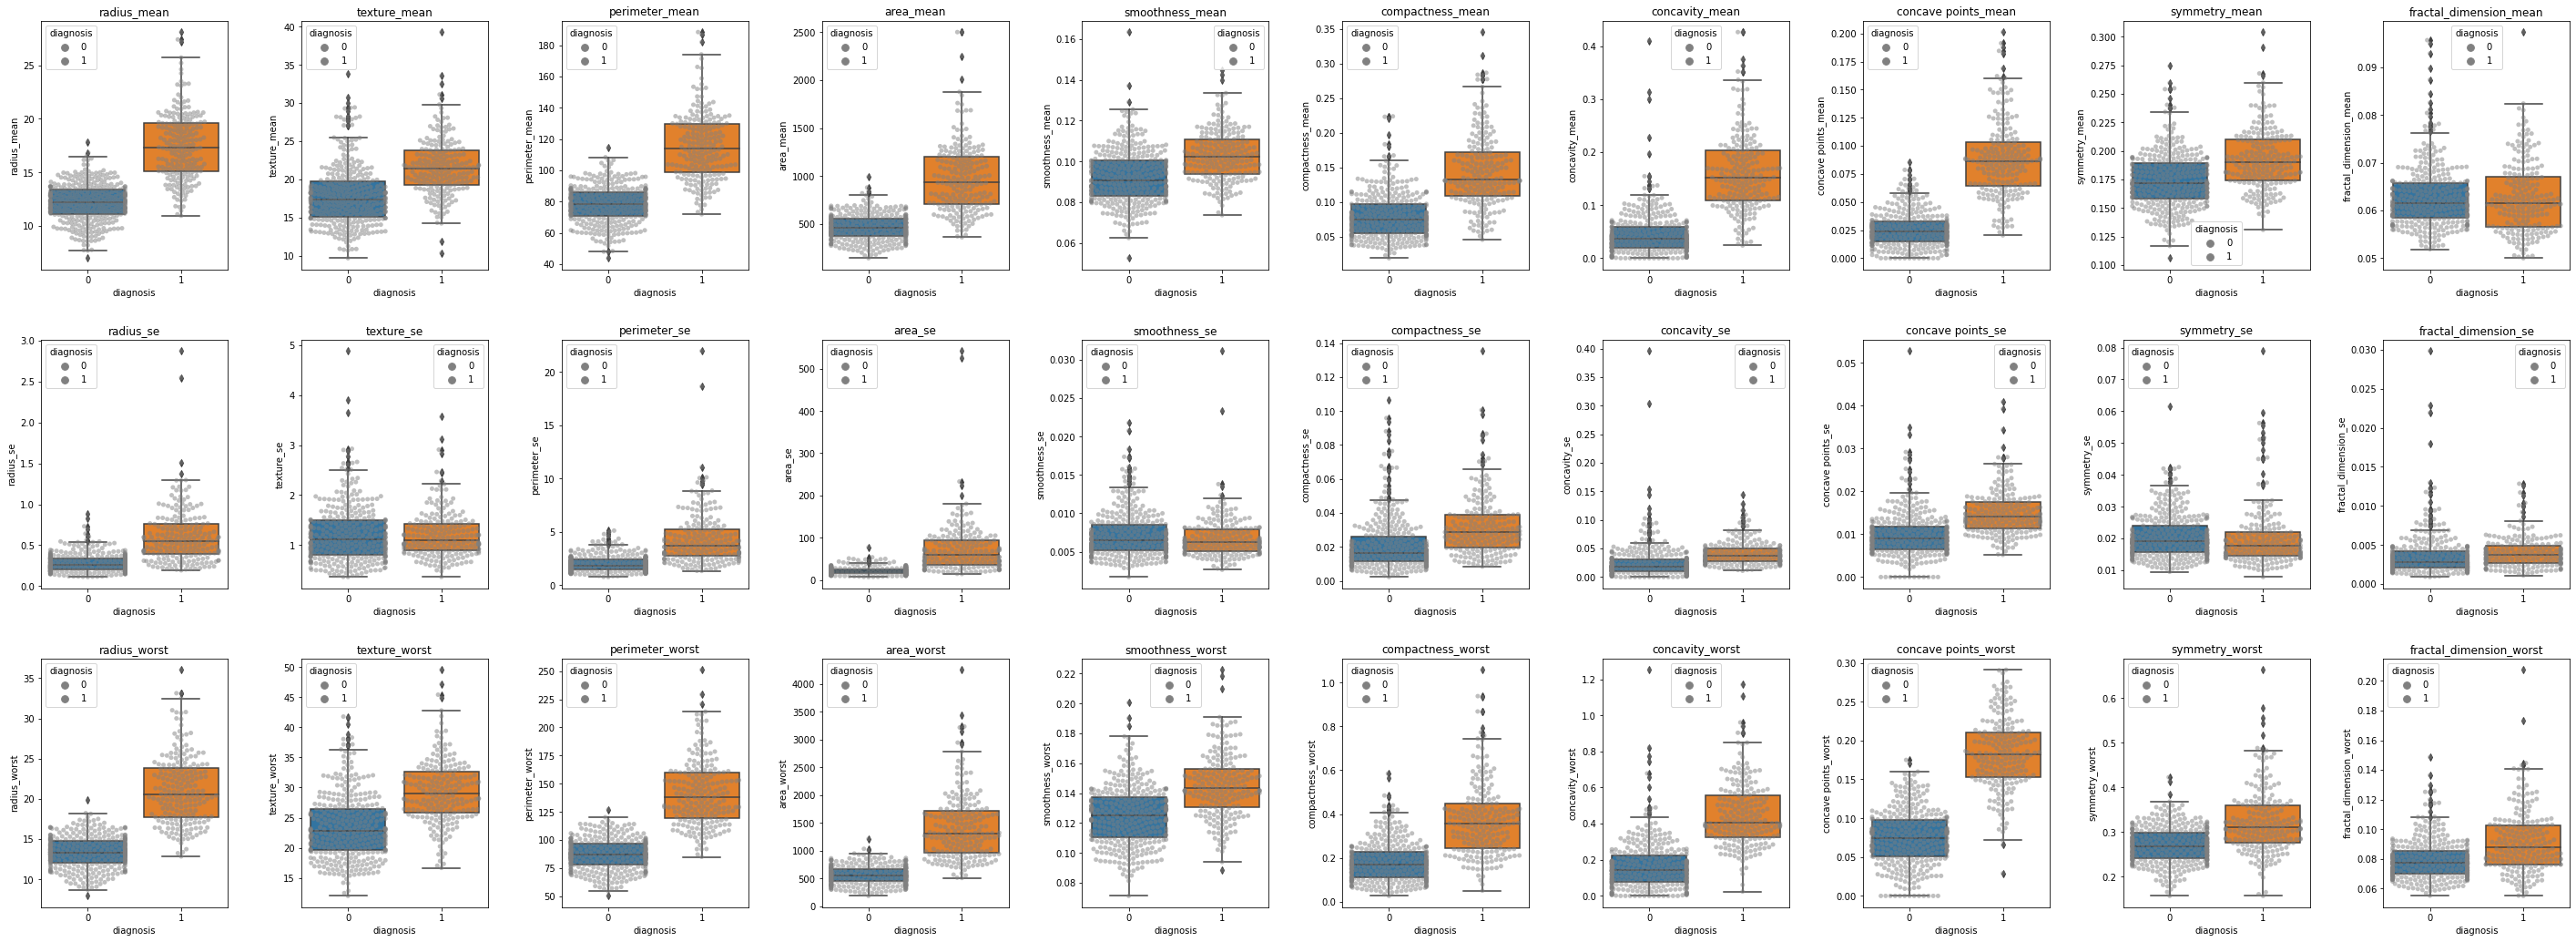

In [15]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    ax = sns.boxplot(x="diagnosis", y=x, data=df)
    ax = sns.swarmplot(x="diagnosis", y=x, data=df, palette = ["gray"], hue="diagnosis", alpha=0.5)
    plt.title('{}'.format(x))

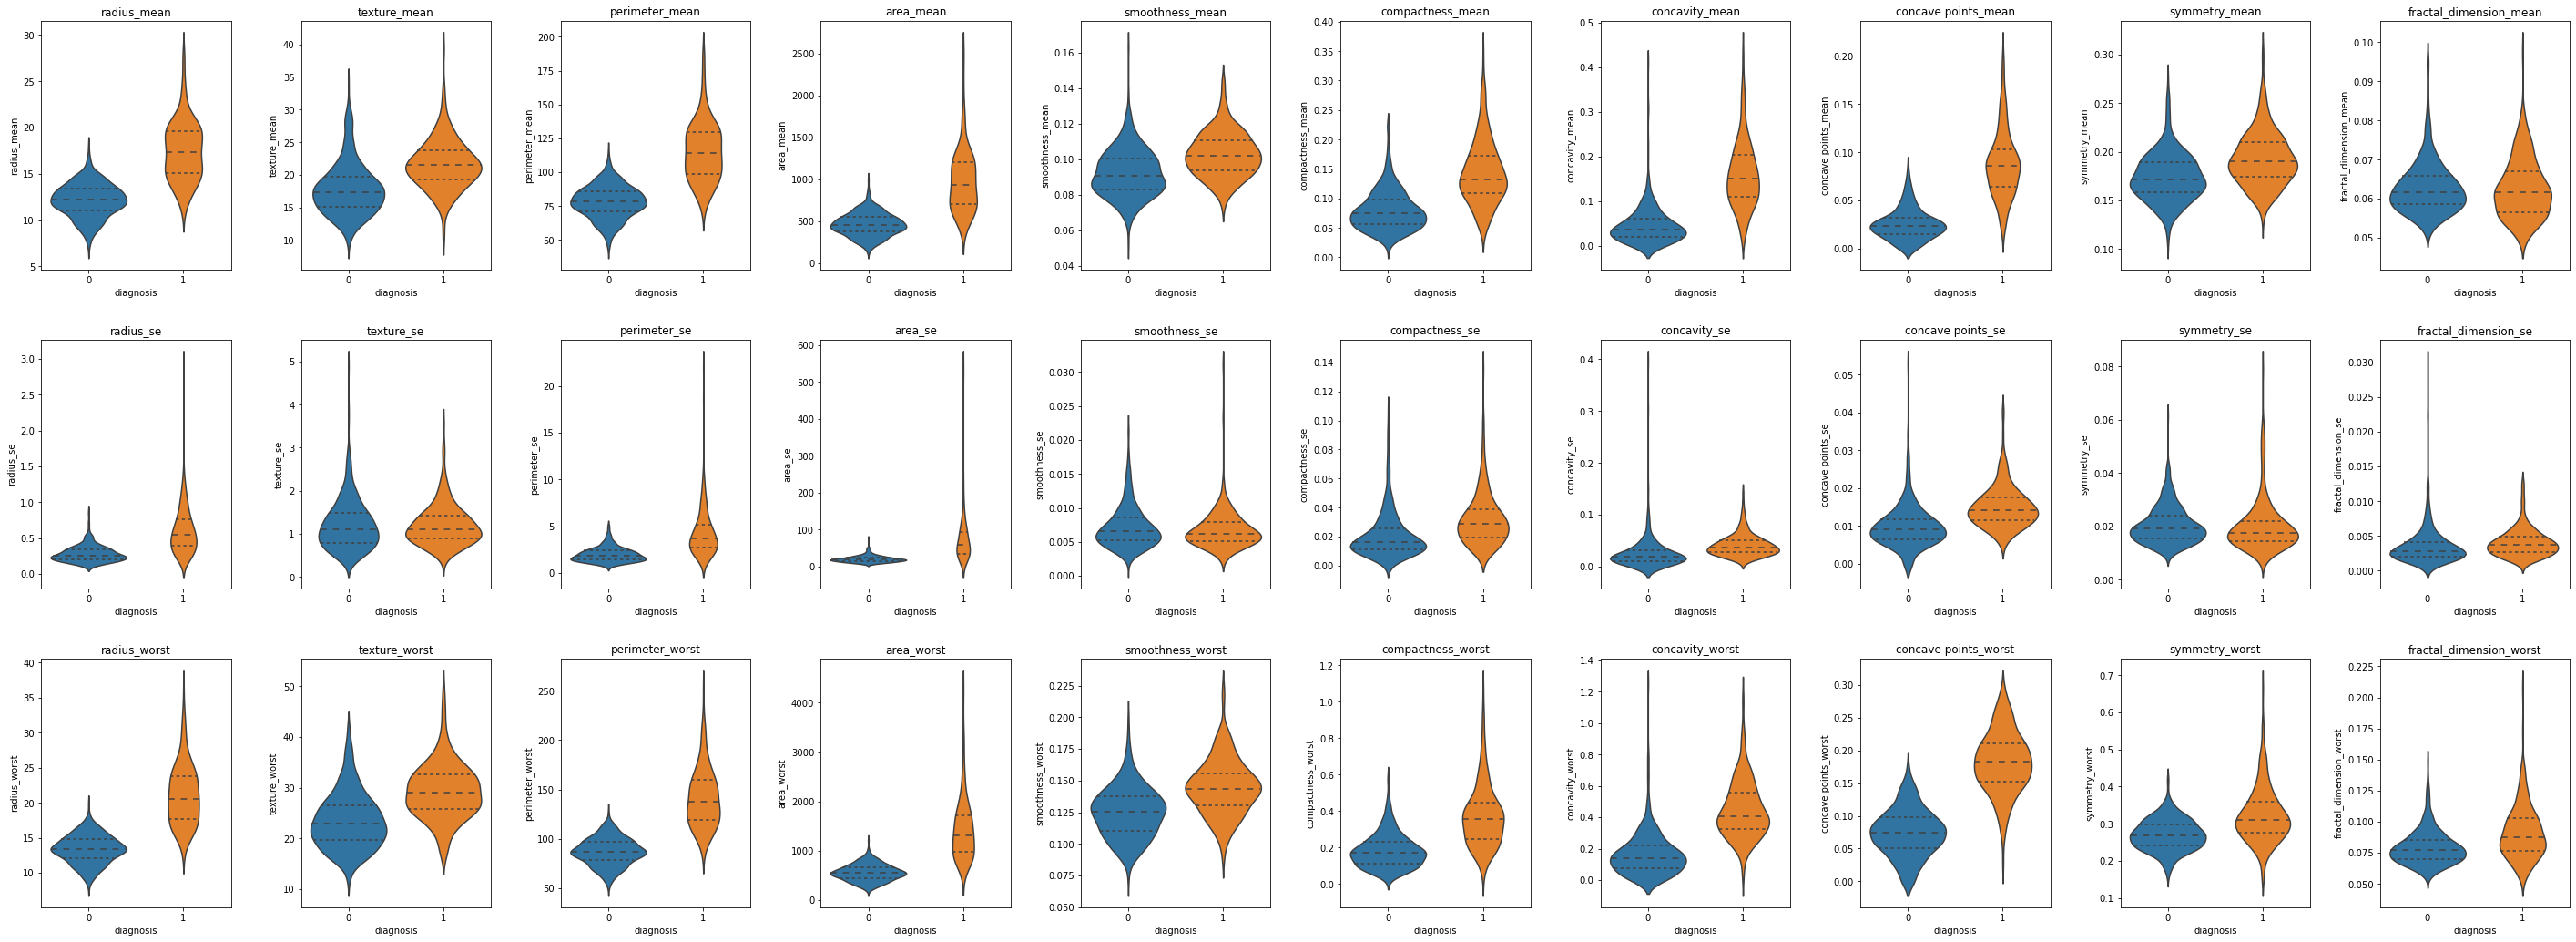

In [16]:
plt.figure(1, figsize=(40, 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
          'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
          'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
          'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
    n += 1
    plt.subplot(3, 10, n)
    plt.subplots_adjust(hspace=3, wspace=3)
    plt.tight_layout(pad=3)
    ax = sns.violinplot(x="diagnosis", y=x, data=df, inner='quartile')
    plt.title('{}'.format(x))
    
plt.show()

There are many features that help to distiguish malignous from benignous cancer. Most of them related to geometrical aspects of cell nuclei.

# Which features to use?


C:\Users\Julian\AppData\Local\Temp\ipykernel_2772\4124065946.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

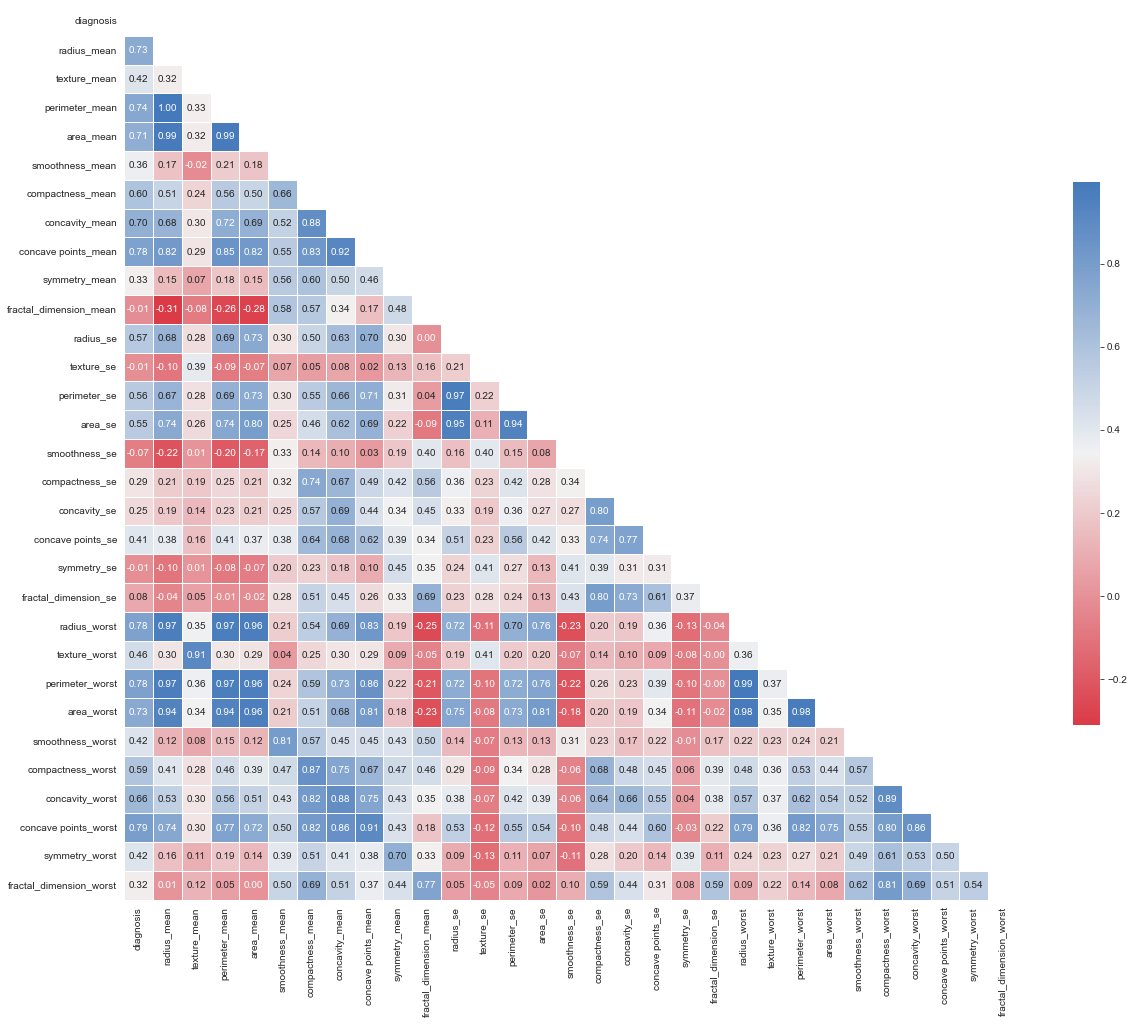

In [17]:
# Correlation matrix

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, 
        annot=True, fmt=".2f", annot_kws={"fontsize": 10}, cbar_kws={"shrink": .5}, ax=ax)


The "worst" or largest (mean of the three largest values) are the features that have higher correlation with the diagnosis (target variable). 
Also, the "worst" variables have high correlation with te "mean" variables of the same measurment. Although in most cases they provide the same information, there could be the posibility of cases were the mean of the nucleous radius (for example) is low because most of the nucleous have their normal shape and only a few may have the variations in nuclear size, shape, chromatin pattern and size and number of nucleoli.

Although ratio, perimiter and area are highly correlated there will be used in the analysis because we may be losing some aditional information that may be relevant for the classification. This characteristics may provide information about the shape and the size of the nucleus, that could be usefull for the diagnosis task.

The standard error (S.E.) provides valuable information regarding the dispersion of data, allowing us to assess the similarity or dissimilarity of cell nuclei. Through the utilization of box plots and correlation matrices, we can observe certain variables that exhibit potential discriminatory power in distinguishing between malignous and benignous breast cancers. Specifically, variables such as radius_se, perimeter_se, area_se, compactness_se, concavity_se, and concave points_se demonstrate promising characteristics for this purpose.

Taking into account the previous analysis, all features will be used to train the model.


## Selected features:

In this first analysis, we will use all the features. And then it will be done a reduction in the less important features.
Although we can observe some low correlations with 


## Tenemos que realizar un escalado de variables?? 

In [18]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# CLASS DISTRIBUTION M/B

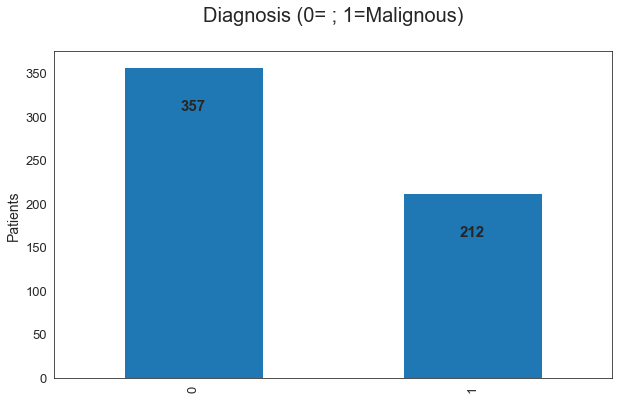

In [19]:

ax = df['diagnosis'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= ; 1=Malignous)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( df['diagnosis'].value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

Balanceado dio peor el accuracy

In [20]:
from sklearn.model_selection import train_test_split

#Creo mi variable predictiva (X) y mi variable target (Y)

#Y = VALOR TARGET --> Si sobrevivieron o no
Y = df.iloc[:,0]

#x = VALOR PREDICTOR, todas las columnas --> Excepto survived
X= df.iloc[:,1:32]
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
#Target variable: Diagnosis (Y)

Y = df.iloc[:,0]
X= df.iloc[:,1:32]


In [22]:
#TRAIN Y TEST
from sklearn.model_selection import train_test_split
#Split de mis datos 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

Matriz de Confusión para Profundidad 1


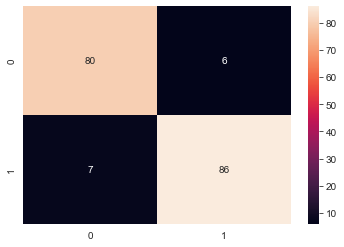

acuracy: 0.9273743016759777
precision: 0.9274594546302268
recall 0.9273743016759777
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.93      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 2


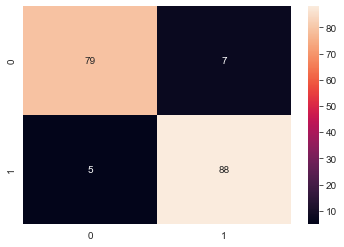

acuracy: 0.9329608938547486
precision: 0.9331191106257263
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        86
           1       0.93      0.95      0.94        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 3


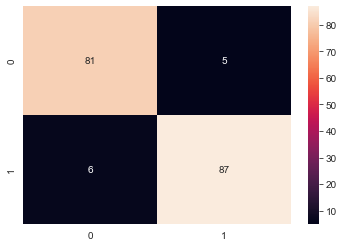

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 4


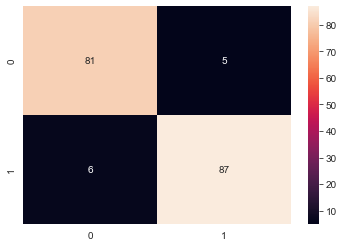

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 5


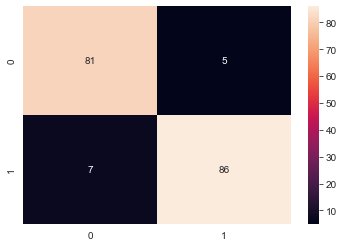

acuracy: 0.9329608938547486
precision: 0.933235758654753
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        86
           1       0.95      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 6


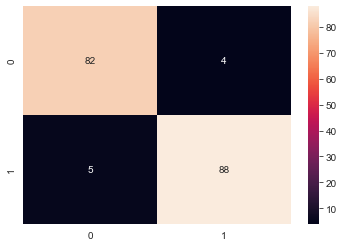

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 7


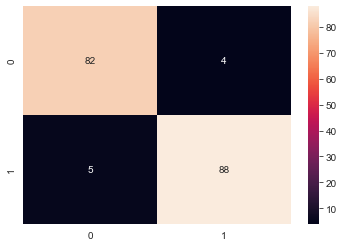

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 8


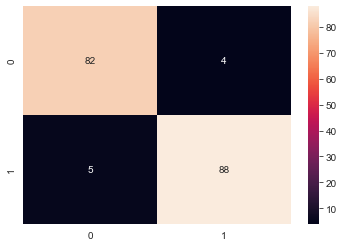

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179

Matriz de Confusión para Profundidad 9


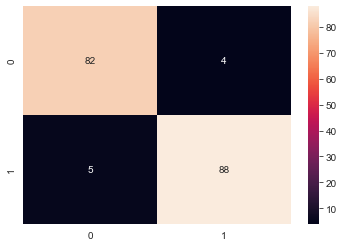

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

# Lista de valores con máxima profundidad:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0, splitter="best")
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
    print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
    print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
    print(metrics.classification_report(y_test, y_pred))

Nos quedamos con el de profundidad 6

In [55]:
clf6 = DecisionTreeClassifier(max_depth = 6, 
                             random_state = 1, splitter="best", probability= True)
clf6.fit(X_train, y_train)    
y_pred = clf6.predict_proba(X_test)
#matriz = confusion_matrix(y_test, y_pred)
#print('Matriz de Confusión para Profundidad',6)
#sn.heatmap(matriz, annot=True)
#plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
#print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
#print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
#print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
#print(metrics.classification_report(y_test, y_pred))



TypeError: __init__() got an unexpected keyword argument 'probability'

In [52]:
#Decision treshhold

y_pred_prob = clf6.predict_proba(X_train)
y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [46]:
#Decision treshhold

y_pred_prob = clf6.predict_proba(X_test)

# Get the predicted probabilities for the malignant class
malignant_probabilities = y_pred_prob[:, 1]

# Convert probabilities to predicted classes using a threshold of 0.5
predicted_classes = (malignant_probabilities > .8).astype(int)

print(malignant_probabilities)
predicted_classes

[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.]


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0])

Matriz de Confusión para Profundidad 6


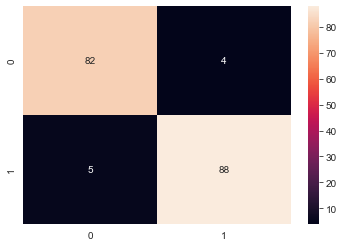

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [47]:
matriz = confusion_matrix(y_test, predicted_classes)
print('Matriz de Confusión para Profundidad',6)
sn.heatmap(matriz, annot=True)
plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
print("acuracy:", accuracy_score(y_test, predicted_classes))
    #precision score
print("precision:", precision_score(y_test, predicted_classes,average='weighted'))
    #recall score
print("recall" , metrics.recall_score(y_test,predicted_classes,average='weighted'))
print(metrics.classification_report(y_test, predicted_classes))

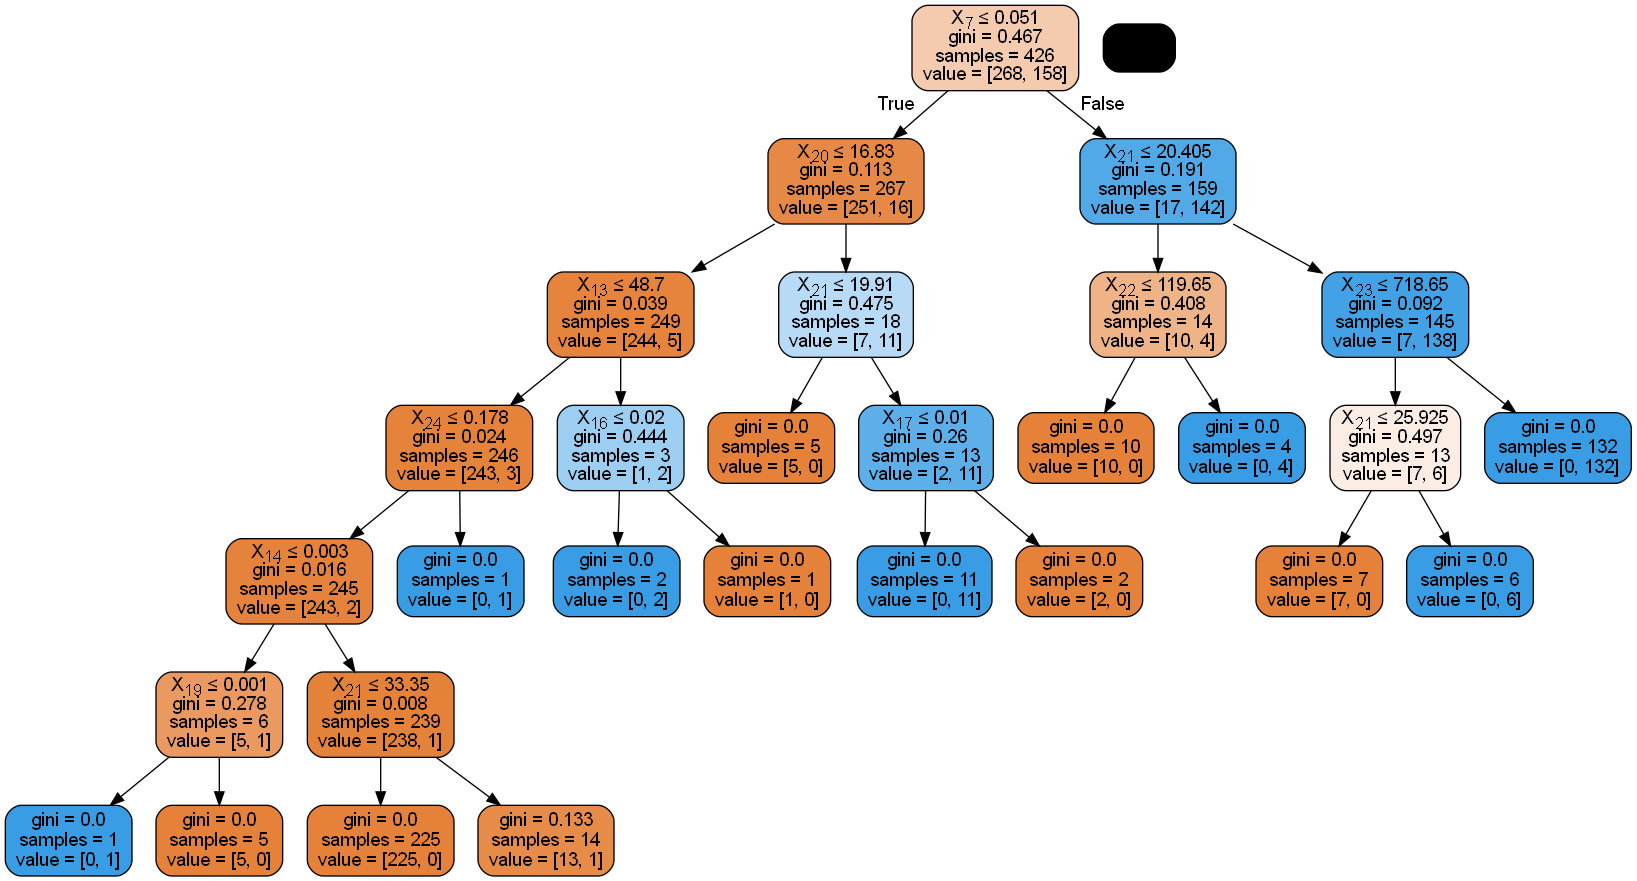

In [27]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf6, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

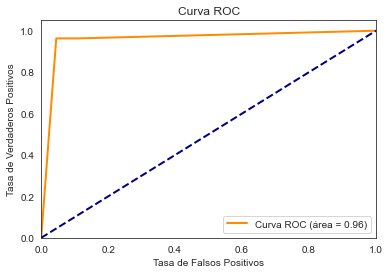

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtén las probabilidades de predicción y las etiquetas reales
y_true = y_test  # Etiquetas reales (0 o 1)
y_scores = clf6.predict_proba(X_test)[:, 1]  # Probabilidades de predicción (entre 0 y 1)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Generate the balanced training dataset 

#Target variable: Diagnosis (Y)

Y = df.iloc[:,0]
X= df.iloc[:,1:32]

In [30]:
## ARBOL DE DECISION CON SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42,sampling_strategy=1)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (569, 30)
Shape of X after SMOTE: (714, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: diagnosis, dtype: float64

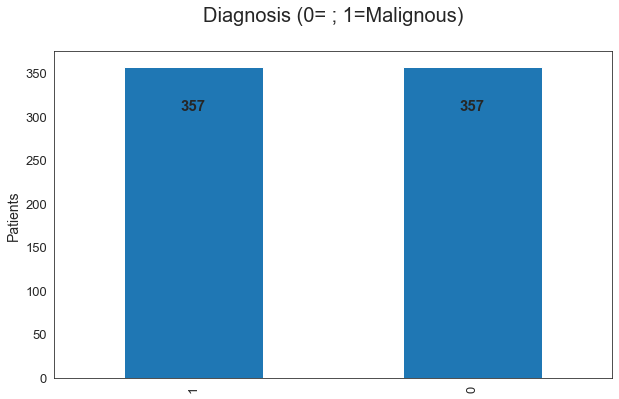

In [31]:
ax = y_sm.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13)
ax.set_title('Diagnosis (0= ; 1=Malignous)', size=20, pad=30)
ax.set_ylabel('Patients', fontsize=14)

for i, value in enumerate( y_sm.value_counts()):
     ax.text(i - 0, value -50 , str(value), ha='center', fontsize=15, weight='bold')

In [32]:
#TRAIN Y TEST
from sklearn.model_selection import train_test_split
#Split de mis datos 

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

Matriz de Confusión para Profundidad 1


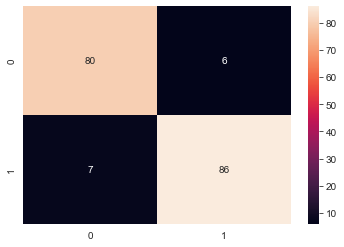

acuracy: 0.9273743016759777
precision: 0.9274594546302268
recall 0.9273743016759777
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.93      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 2


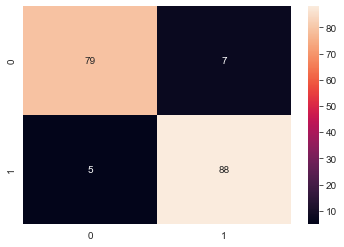

acuracy: 0.9329608938547486
precision: 0.9331191106257263
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        86
           1       0.93      0.95      0.94        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 3


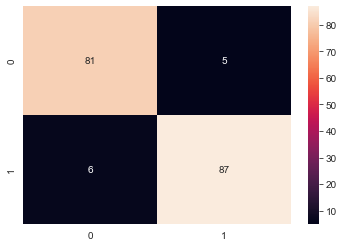

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 4


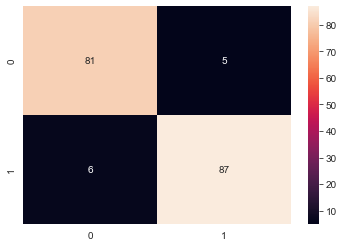

acuracy: 0.9385474860335196
precision: 0.9386291491125945
recall 0.9385474860335196
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.95      0.94      0.94        93

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Matriz de Confusión para Profundidad 5


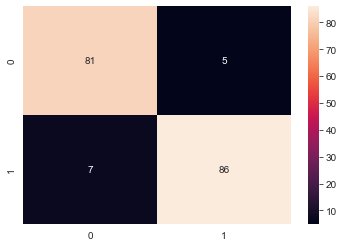

acuracy: 0.9329608938547486
precision: 0.933235758654753
recall 0.9329608938547486
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        86
           1       0.95      0.92      0.93        93

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179

Matriz de Confusión para Profundidad 6


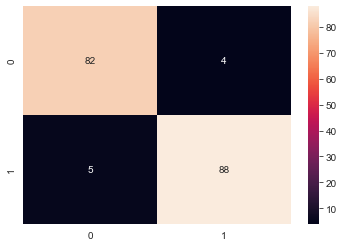

acuracy: 0.9497206703910615
precision: 0.9497988435949624
recall 0.9497206703910615
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.95      0.95        93

    accuracy                           0.95       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.95      0.95      0.95       179



In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

# Lista de valores con máxima profundidad:
max_depth_range = list(range(1, 7))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0,)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
#    score = clf.score(X_test, Y_test)
#    accuracy.append(score)   
#    print('Profundidad',depth ,'Precisión',score)
    #accuracy
    print("acuracy:", accuracy_score(y_test, y_pred))
    #precision score
    print("precision:", precision_score(y_test, y_pred,average='weighted'))
    #recall score
    print("recall" , metrics.recall_score(y_test,y_pred,average='weighted'))
    print(metrics.classification_report(y_test, y_pred))